In [106]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.En.csv')

print(df.head())
print("Shape:", df.shape)

   Unnamed: 0                                              tweet  sarcastic  \
0           0  The only thing I got from college is a caffein...          1   
1           1  I love it when professors draw a big question ...          1   
2           2  Remember the hundred emails from companies whe...          1   
3           3  Today my pop-pop told me I was not “forced” to...          1   
4           4  @VolphanCarol @littlewhitty @mysticalmanatee I...          1   

                                            rephrase  sarcasm  irony  satire  \
0  College is really difficult, expensive, tiring...      0.0    1.0     0.0   
1  I do not like when professors don’t write out ...      1.0    0.0     0.0   
2  I, at the bare minimum, wish companies actuall...      0.0    1.0     0.0   
3  Today my pop-pop told me I was not "forced" to...      1.0    0.0     0.0   
4  I would say Ted Cruz is an asshole and doesn’t...      1.0    0.0     0.0   

   understatement  overstatement  rhetorical

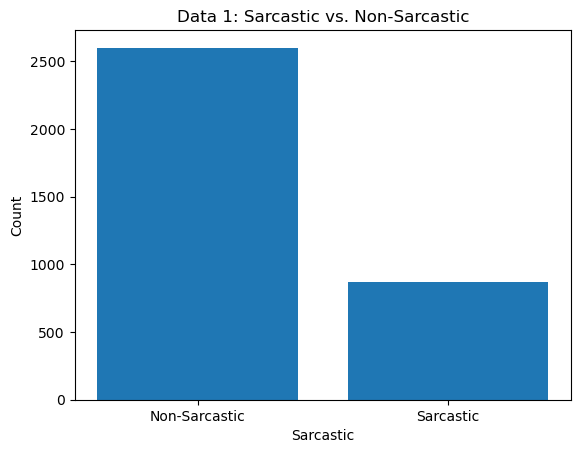

In [107]:
# Calculate the number of sarcastic and non-sarcastic data
sarcastic_counts = df['sarcastic'].value_counts()
plt.bar(sarcastic_counts.index, sarcastic_counts.values)
plt.xlabel('Sarcastic')
plt.ylabel('Count')
plt.title('Data 1: Sarcastic vs. Non-Sarcastic')
plt.xticks(sarcastic_counts.index, ['Non-Sarcastic', 'Sarcastic'])
plt.show()

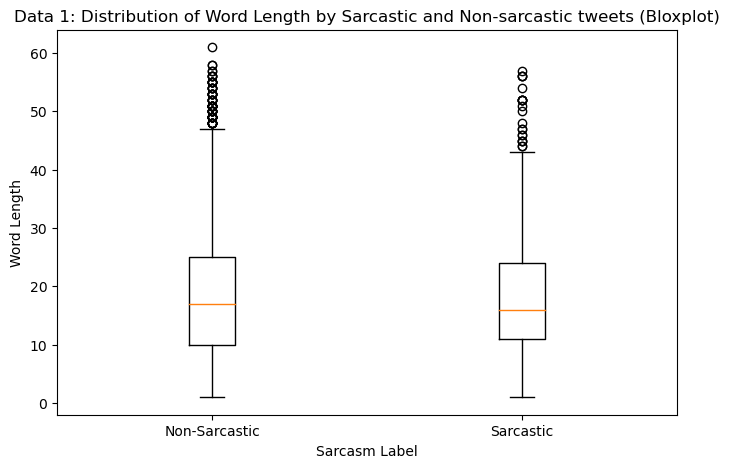

In [108]:
# Calculate the word length for each tweet
df['word_length'] = df['tweet'].apply(lambda x: len(str(x).split()))

# Create a box plot of word length by sarcastic label
plt.figure(figsize=(8, 5))
plt.boxplot([df[df['sarcastic'] == 0]['word_length'],
             df[df['sarcastic'] == 1]['word_length']],
            labels=['Non-Sarcastic', 'Sarcastic'])
plt.xlabel('Sarcasm Label')
plt.ylabel('Word Length')
plt.title('Data 1: Distribution of Word Length by Sarcastic and Non-sarcastic tweets (Bloxplot)')
plt.show()

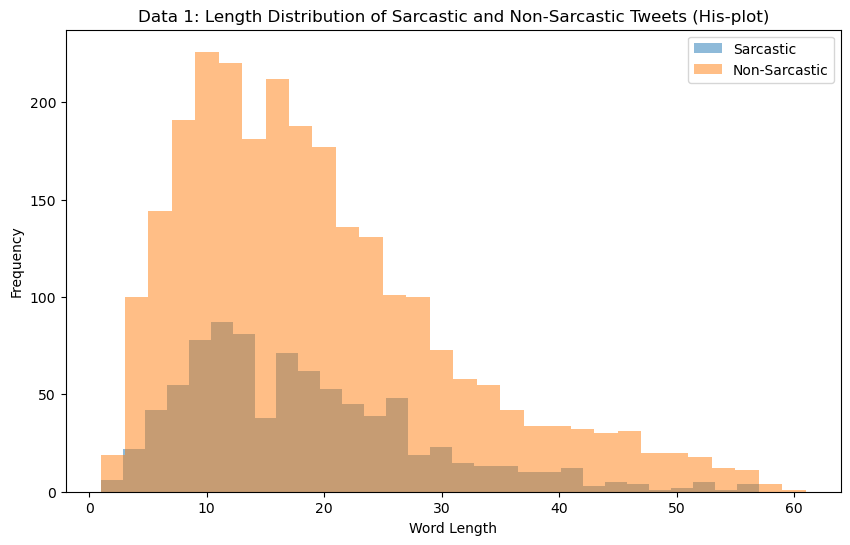

In [109]:
# Filter the DataFrame for sarcastic and non-sarcastic tweets
sarcastic_tweets = df[df['sarcastic'] == 1]
non_sarcastic_tweets = df[df['sarcastic'] == 0]

# Plot the length distribution for sarcastic and non-sarcastic tweets
plt.figure(figsize=(10, 6))
plt.hist(sarcastic_tweets['tweet'].apply(lambda x: len(str(x).split())), bins=30, alpha=0.5, label='Sarcastic')
plt.hist(non_sarcastic_tweets['tweet'].apply(lambda x: len(str(x).split())), bins=30, alpha=0.5, label='Non-Sarcastic')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Data 1: Length Distribution of Sarcastic and Non-Sarcastic Tweets (His-plot)')
plt.legend()
plt.show()

In [110]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liuzhichao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liuzhichao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

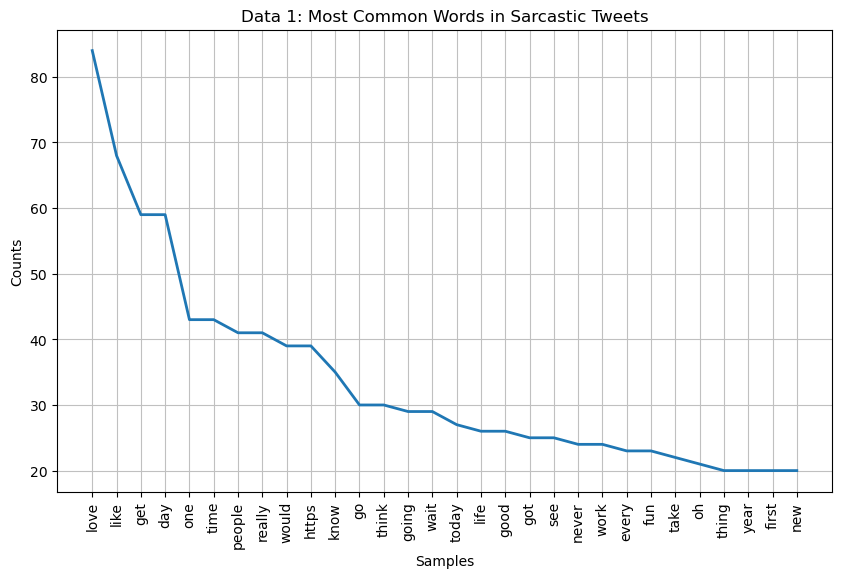

<AxesSubplot:title={'center':'Data 1: Most Common Words in Sarcastic Tweets'}, xlabel='Samples', ylabel='Counts'>

In [112]:
# Filter the DataFrame for sarcastic tweets
sarcastic_tweets = df[df['sarcastic'] == 1]

sarcastic_words = []

stop_words = set(stopwords.words('english'))

for tweet in sarcastic_tweets['tweet']:
    tokens = word_tokenize(tweet.lower())
    filtered_words = [word for word in tokens if word.isalpha() and word not in stop_words]
    sarcastic_words.extend(filtered_words)
    
# Calculate the frequency distribution of words
fdist = FreqDist(sarcastic_words)

# Plot the most common words
plt.figure(figsize=(10, 6))
fdist.plot(30, title='Data 1: Most Common Words in Sarcastic Tweets')

In [113]:
import numpy as np

In [114]:
df = pd.read_csv('train-balanced-sarcasm.csv')

print(df.head())
print("Shape:", df2.shape)

   label                                            comment     author  \
0      0                                         NC and NH.  Trumpbart   
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc  \
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23   
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimateTeam      6   -1     -1  2016-12  2016-12-30 17:00:13   

                                      parent_comment  
0  Yeah, I get that argument. At this point, I'd ...  


In [115]:
# Calculate the maximum and lowest score
max_score = df['score'].max()
min_score = df['score'].min()

# Get the number of data points and unique subreddits
num_data_points = len(df)
num_subreddits = df['subreddit'].nunique()

# Create a DataFrame to represent the general information as a table
info_table = pd.DataFrame({
    'Max Score': [max_score],
    'Min Score': [min_score],
    'Number of Data Points': [num_data_points],
    'Number of Subreddits': [num_subreddits]
})

# Display the information table
print(info_table)

   Max Score  Min Score  Number of Data Points  Number of Subreddits
0       9070       -507                1010826                 14878


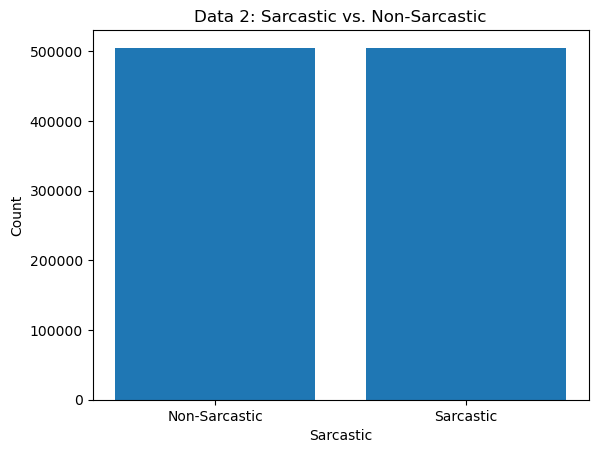

In [116]:
sarcastic_counts = df['label'].value_counts()
plt.bar(sarcastic_counts.index, sarcastic_counts.values)
plt.xlabel('Sarcastic')
plt.ylabel('Count')
plt.title('Data 2: Sarcastic vs. Non-Sarcastic')
plt.xticks(sarcastic_counts.index, ['Non-Sarcastic', 'Sarcastic'])
plt.show()

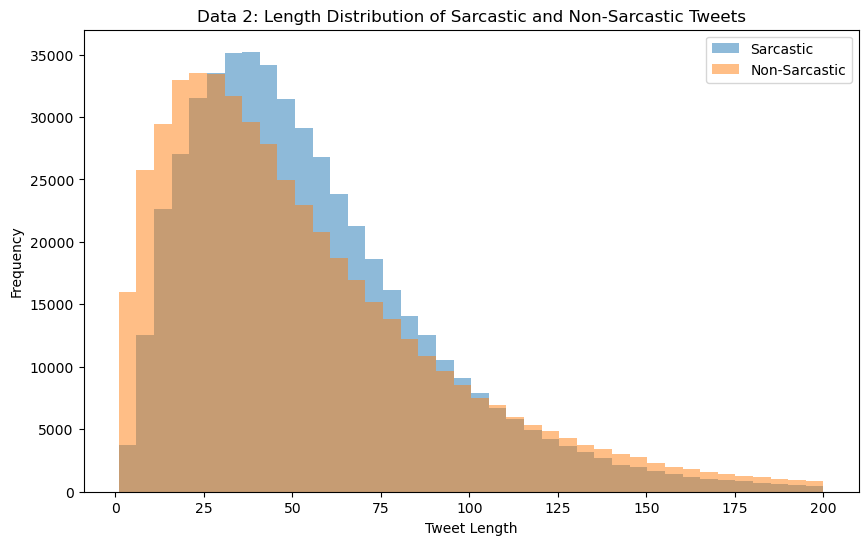

In [117]:
sarcastic_tweets = df[df['label'] == 1]
non_sarcastic_tweets = df[df['label'] == 0]

# Calculate the length of tweets
sarcastic_tweet_lengths = sarcastic_tweets['comment'].apply(lambda x: len(str(x)))
non_sarcastic_tweet_lengths = non_sarcastic_tweets['comment'].apply(lambda x: len(str(x)))

# Filter the tweet lengths in the range from 0 to 200
sarcastic_tweet_lengths = sarcastic_tweet_lengths[(sarcastic_tweet_lengths >= 0) & (sarcastic_tweet_lengths <= 200)]
non_sarcastic_tweet_lengths = non_sarcastic_tweet_lengths[(non_sarcastic_tweet_lengths >= 0) & (non_sarcastic_tweet_lengths <= 200)]

# Plot the length distribution of sarcastic and non-sarcastic tweets
plt.figure(figsize=(10, 6))
plt.hist(sarcastic_tweet_lengths, bins=40, alpha=0.5, label='Sarcastic')
plt.hist(non_sarcastic_tweet_lengths, bins=40, alpha=0.5, label='Non-Sarcastic')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Data 2: Length Distribution of Sarcastic and Non-Sarcastic Tweets')
plt.legend()
plt.show()

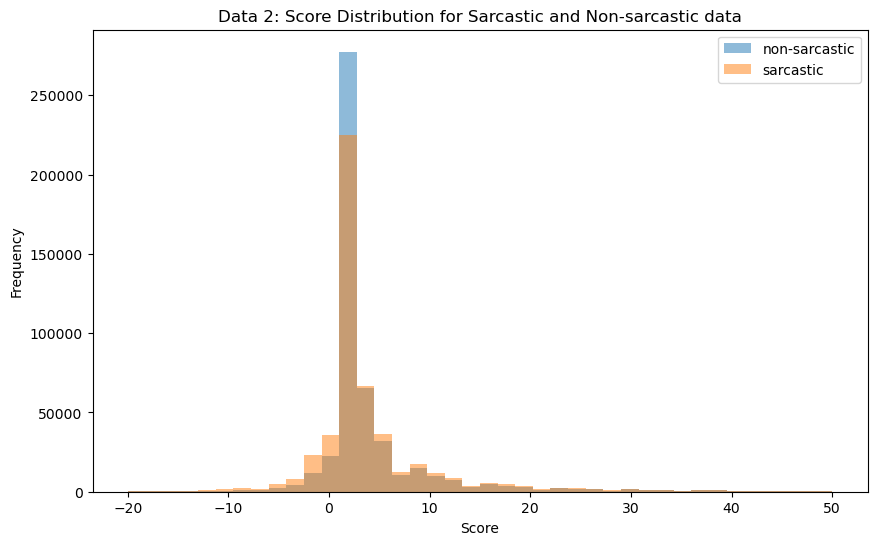

In [118]:
# Filter the DataFrame for label=0 and label=1 data
label_0_data = df[df['label'] == 0]
label_1_data = df[df['label'] == 1]

# Filter the scores in the range from -20 to 50
label_0_scores = label_0_data['score'][(label_0_data['score'] >= -20) & (label_0_data['score'] <= 50)]
label_1_scores = label_1_data['score'][(label_1_data['score'] >= -20) & (label_1_data['score'] <= 50)]

# Plot the score distribution for label=0 and label=1 data
plt.figure(figsize=(10, 6))
plt.hist(label_0_scores, bins=40, alpha=0.5, label='non-sarcastic')
plt.hist(label_1_scores, bins=40, alpha=0.5, label='sarcastic')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Data 2: Score Distribution for Sarcastic and Non-sarcastic data')
plt.legend()
plt.show()

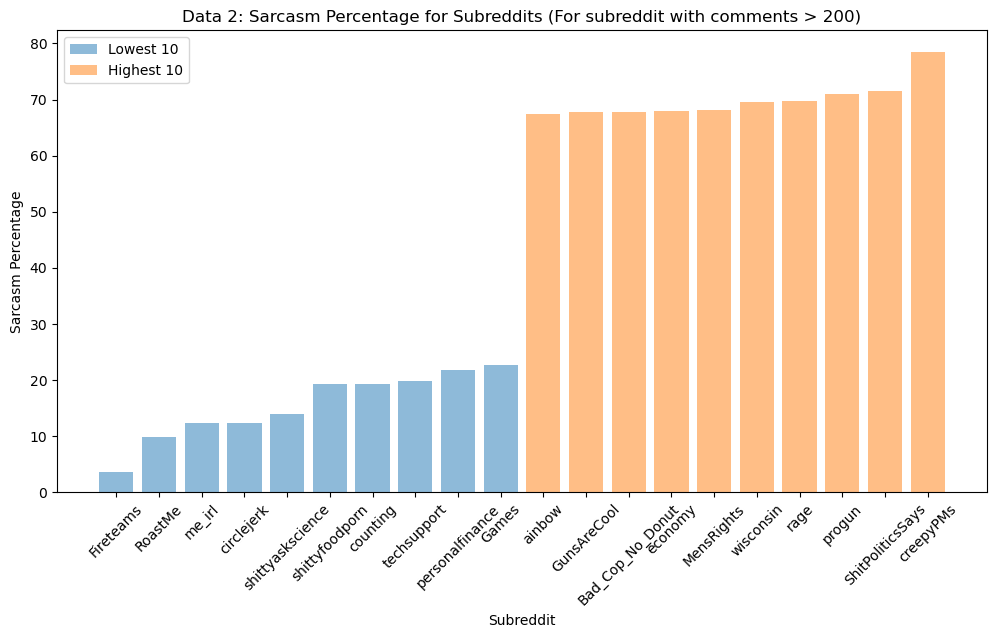

In [119]:
subreddit_comment_counts = df['subreddit'].value_counts()
subreddits_over_200 = subreddit_comment_counts[subreddit_comment_counts > 200].index
df_filtered = df[df['subreddit'].isin(subreddits_over_200)]

subreddit_counts = df_filtered['subreddit'].value_counts()
subreddit_sarcasm_percentage = (df_filtered[df_filtered['label'] == 1]['subreddit'].value_counts()) / subreddit_counts  * 100


# Sort the subreddits by sarcasm percentage in ascending order
subreddit_sarcasm_percentage_sorted = subreddit_sarcasm_percentage.sort_values()

# Get the lowest and highest 10 subreddits
lowest_10_subreddits = subreddit_sarcasm_percentage_sorted.head(10)
highest_10_subreddits = subreddit_sarcasm_percentage_sorted.tail(10)

# Create a bar plot to visualize sarcasm percentage for subreddits
plt.figure(figsize=(12, 6))
plt.bar(lowest_10_subreddits.index, lowest_10_subreddits.values, alpha=0.5, label='Lowest 10')
plt.bar(highest_10_subreddits.index, highest_10_subreddits.values, alpha=0.5, label='Highest 10')
plt.xlabel('Subreddit')
plt.ylabel('Sarcasm Percentage')
plt.title('Data 2: Sarcasm Percentage for Subreddits (For subreddit with comments > 200)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

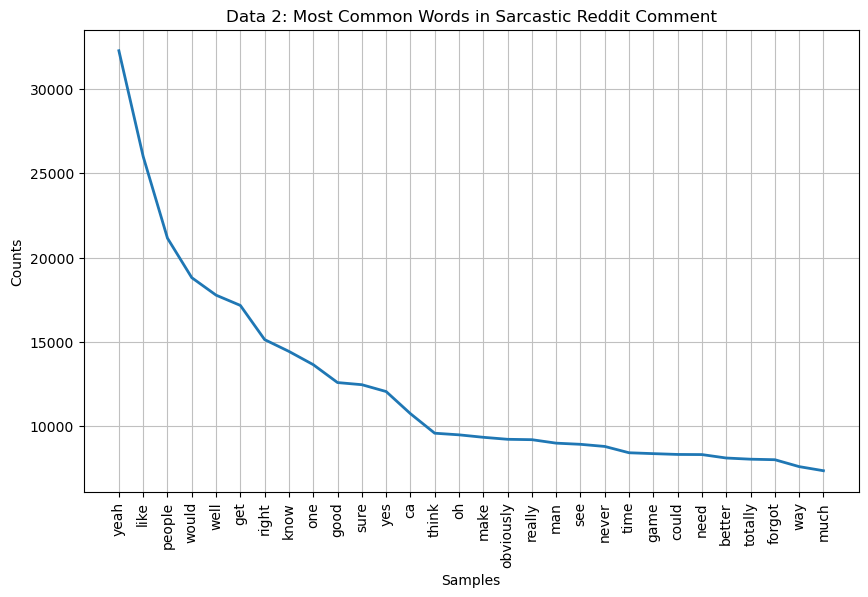

<AxesSubplot:title={'center':'Data 2: Most Common Words in Sarcastic Reddit Comment'}, xlabel='Samples', ylabel='Counts'>

In [120]:
# Filter the DataFrame for sarcastic tweets
sarcastic_tweets = df[df['label'] == 1]

sarcastic_words = []

stop_words = set(stopwords.words('english'))

for tweet in sarcastic_tweets['comment']:
    if isinstance(tweet, float):
        continue
    tokens = word_tokenize(tweet.lower())
    filtered_words = [word for word in tokens if word.isalpha() and word not in stop_words]
    sarcastic_words.extend(filtered_words)
    
# Calculate the frequency distribution of words
fdist = FreqDist(sarcastic_words)

# Plot the most common words
plt.figure(figsize=(10, 6))
fdist.plot(30, title='Data 2: Most Common Words in Sarcastic Reddit Comment')